In [ ]:
!apt-get -y install fonts-ipafont-gothic
!pip install japanize-matplotlib

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 45 not upgraded.
Need to get 8,237 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-ipafont-gothic all 00303-21ubuntu1 [3,513 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-ipafont-mincho all 00303-21ubuntu1 [4,724 kB]
Fetched 8,237 kB in 3s (2,464 kB/s)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 121918 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-gothic_00303-21ubuntu1_all.deb ...
Unpacking fonts-ipafont-gothic (00303-21ubuntu1) ...
Selecting previously unselected package fonts-ipa

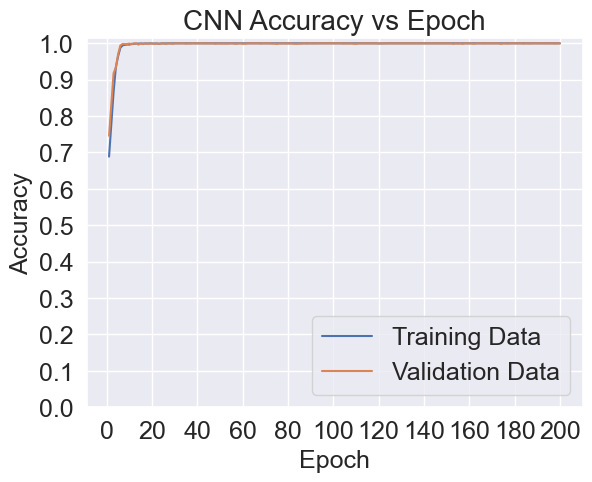

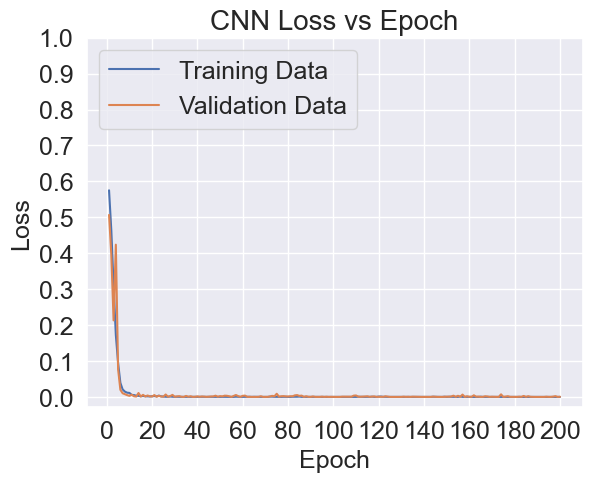

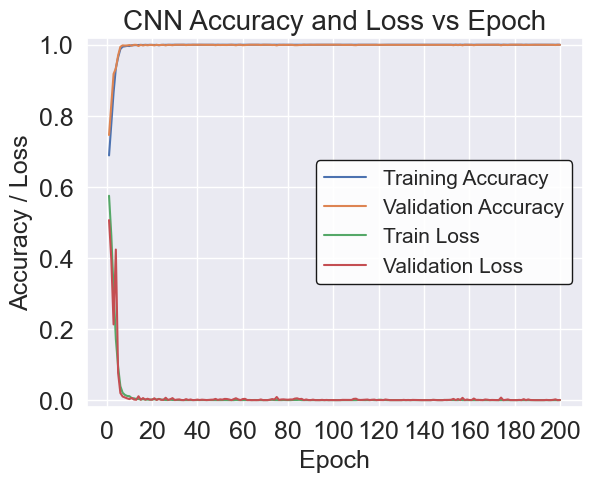

In [ ]:
#2回目グラフ
import pandas as pd
import numpy as np
# グラフを描画するライブラリ
from matplotlib import pyplot as plt
import seaborn as sns
sns.set() # seabornの設定を無効化
# sns.reset_orig() # seabornの設定をリセットしてmatplotlibのデフォルトに戻す
import matplotlib.pyplot as plt
#import japanize_matplotlib
import datetime as dt
from pathlib import Path
%matplotlib inline

# matplotlibのスタイルを明示的に設定（seabornの影響を排除）
# plt.style.use('default')  # matplotlibのデフォルトスタイルを使用
#seabornのフォントは必ずjapanize_matplotlibのデフォルトのやつに合わせること　でないと文字化け
#sns.set(font='IPAexGothic')

csv_path=r"../20250826Data/History/"
filedate="20250827_2140"

df_trainacc=pd.read_csv(Path(csv_path + filedate + "/Train_Acc.csv"))
df_valacc=pd.read_csv(Path(csv_path + filedate + "/Val_Acc.csv"))
df_trainloss=pd.read_csv(Path(csv_path + filedate + "/Train_Loss.csv"))
df_valloss=pd.read_csv(Path(csv_path + filedate + "/Val_Loss.csv"))

ep=np.arange(1, len(df_trainacc)+1)
epochs=len(df_trainacc)

def plot_acc(train_accuracies, val_accuracies):
    plt.plot(ep, train_accuracies)
    plt.plot(ep, val_accuracies)
    plt.title("CNN Accuracy vs Epoch", fontsize=20)
    plt.ylabel("Accuracy", fontsize=18)
    plt.xlabel("Epoch", fontsize=18)
    plt.xticks(np.arange(0, epochs+1, 20), fontsize=18)
    plt.yticks(np.arange(0.0, 1.05, 0.1), fontsize=18)
    plt.legend(["Training Data", "Validation Data"], loc="lower right", fontsize=18)
    plt.show()

def plot_loss(train_losses, val_losses):
    plt.plot(ep, train_losses)
    plt.plot(ep, val_losses)
    plt.title("CNN Loss vs Epoch", fontsize=20)
    plt.ylabel("Loss", fontsize=18)
    plt.xlabel("Epoch", fontsize=18)
    plt.xticks(np.arange(0, epochs+1, 20), fontsize=18)
    plt.yticks(np.arange(0.0, 1.05, 0.1), fontsize=18)
    plt.legend(["Training Data", "Validation Data"], loc="upper left", fontsize=18)
    plt.show()

def plot_accuracy_and_loss(train_accuracies, val_accuracies, train_losses, val_losses):
    # figure()でグラフを描画する領域を確保，figというオブジェクトにする．
    fig = plt.figure()

    # add_subplot()でグラフを描画する領域を追加する．引数は行，列，場所
    ax1 = fig.add_subplot(1, 1, 1)
    # ax2 = ax1.twinx()   # x軸を共有
    ax1.set_axisbelow(True)
    # ax2.set_axisbelow(True)
    plt.rcParams['axes.axisbelow'] = True
    # グリッドのzorderを設定（凡例より奥に）
    ax1.grid(True, zorder=1)
    # ax2.grid(True, zorder=1)

    c1, c2, c3, c4 = "blue", "red", "green", "yellow"  # 各プロットの色
    l1, l2, l3, l4 = "Training Accuracy", "Validation Accuracy", "Train Loss", "Validation Loss" # 各ラベル

    # 1つ目のグラフを描画
    ax1.plot(ep, train_accuracies, label=l1)
    ax1.plot(ep, val_accuracies, label=l2)
    ax1.plot(ep, train_losses, label=l3)
    ax1.plot(ep, val_losses, label=l4)




    # 凡例を統合
    h1, l1 = ax1.get_legend_handles_labels()
    # h2, l2 = ax2.get_legend_handles_labels()

    legend = ax1.legend(h1, l1, loc='right', frameon=True, fontsize=15) # ax1とax2の凡例のhandlerとlabelのリストを結合
    legend.set_zorder(1000)  # 凡例を前面に表示
    legend.get_frame().set_facecolor('white')  # 凡例の背景を白に設定
    legend.get_frame().set_alpha(0.9)  # 凡例の背景の透明度を設定
    legend.get_frame().set_edgecolor('black')  # 凡例の枠線を黒に設定



    ax1.set_xlabel('Epoch', fontsize=18) #x軸ラベル
    ax1.set_ylabel('Accuracy / Loss', fontsize=18) #y軸ラベル
    ax1.set_xticks(np.arange(0, epochs+1, 20))
    ax1.set_yticks(np.arange(0.0, 1.05, 0.2))
    ax1.set_ylim(-0.02, 1.02)
    ax1.set_title("CNN Accuracy and Loss vs Epoch", fontsize=20) #グラフタイトル

    # 目盛りのフォントサイズを18に設定
    ax1.tick_params(axis='x', labelsize=18)
    ax1.tick_params(axis='y', labelsize=18)

    # 2つ目のグラフを描画
    # ax2.set_ylabel('Loss', fontsize=18) #y軸ラベル
    # ax2.set_yticks(np.arange(0.0, 1.05, 0.2))
    # ax2.set_ylim(-0.02, 1.02)

    plt.show()




plot_acc(df_trainacc["Accuracy"], df_valacc["Accuracy"])
plot_loss(df_trainloss["Loss"], df_valloss["Loss"])
plot_accuracy_and_loss(df_trainacc["Accuracy"], df_valacc["Accuracy"], df_trainloss["Loss"], df_valloss["Loss"])

In [ ]:
import torch
    plt.plot(ep, train_accuracies)
    plt.plot(ep, val_accuracies)
    plt.plot(ep, train_losses)
    plt.plot(ep, val_losses)
    plt.title("CNN Accuracy and Loss vs Epoch", fontsize=20)
    plt.ylabel("Accuracy", fontsize=18)
    plt.ylabel("Loss", fontsize=18)
    plt.xlabel("Epoch", fontsize=18)
    plt.xticks(np.arange(0, epochs+1, 10), fontsize=18)
    plt.yticks(np.arange(0.0, 1.05, 0.1), fontsize=18)
    plt.legend(["Training Accuracy", "Validation Accuracy", "Train Loss", "Validation Loss"], loc="upper left", fontsize=18)
    plt.show()